# Decision Tree Modeling

In [84]:
#libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pydataset import data

In [85]:
#data
mt = data('mtcars')
print(mt.shape, mt.columns,'\n')
print(mt.dtypes, '\n', mt[['mpg','wt','hp','gear']].head())

(32, 11) Index(['mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear',
       'carb'],
      dtype='object') 

mpg     float64
cyl       int64
disp    float64
hp        int64
drat    float64
wt      float64
qsec    float64
vs        int64
am        int64
gear      int64
carb      int64
dtype: object 
                     mpg     wt   hp  gear
Mazda RX4          21.0  2.620  110     4
Mazda RX4 Wag      21.0  2.875  110     4
Datsun 710         22.8  2.320   93     4
Hornet 4 Drive     21.4  3.215  110     3
Hornet Sportabout  18.7  3.440  175     3


In [86]:
data1 = mt[['am','wt','mpg','hp']]
X = data1.drop(columns = 'am')
y = data1.am
print(X.shape, y.shape)

(32, 3) (32,)


In [87]:
#may do train/test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=123)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(25, 3) (7, 3) (25,) (7,)


In [88]:
from sklearn.tree import DecisionTreeClassifier

In [89]:
clsModel = DecisionTreeClassifier(max_depth=5,random_state=123).fit(X_train, y_train)  #model with parameter
clsModel.classes_

array([0, 1], dtype=int64)

In [90]:
y_predDT1A = clsModel.predict(X_train)
y_predDT1B = clsModel.predict(X_test)
print('Train Data ', y_predDT1A, '\n Test Data ', y_predDT1B)

Train Data  [0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 0 0 1 1 0 1 1 1 0 1] 
 Test Data  [1 1 0 1 1 1 0]


In [91]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [93]:
clsReport = classification_report(y_true=y_test, y_pred= y_predDT1B)
cm = confusion_matrix(y_true=y_test, y_pred=y_predDT1B)
accScore = accuracy_score(y_true=y_test, y_pred=y_predDT1B)
print('Classification Report ', clsReport)
print('Confusion Matrix ', cm)
print('Accuracy Score ', accScore) #.71

Classification Report                precision    recall  f1-score   support

           0       1.00      0.50      0.67         4
           1       0.60      1.00      0.75         3

    accuracy                           0.71         7
   macro avg       0.80      0.75      0.71         7
weighted avg       0.83      0.71      0.70         7

Confusion Matrix  [[2 2]
 [0 3]]
Accuracy Score  0.7142857142857143


In [94]:
from graphviz import Source
from sklearn import tree

[Text(0.5555555555555556, 0.875, 'x[0] <= 3.192\ngini = 0.48\nsamples = 25\nvalue = [15, 10]'),
 Text(0.3333333333333333, 0.625, 'x[1] <= 22.15\ngini = 0.18\nsamples = 10\nvalue = [1, 9]'),
 Text(0.2222222222222222, 0.375, 'x[0] <= 2.542\ngini = 0.32\nsamples = 5\nvalue = [1, 4]'),
 Text(0.1111111111111111, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.3333333333333333, 0.125, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.4444444444444444, 0.375, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(0.7777777777777778, 0.625, 'x[2] <= 290.0\ngini = 0.124\nsamples = 15\nvalue = [14, 1]'),
 Text(0.6666666666666666, 0.375, 'gini = 0.0\nsamples = 14\nvalue = [14, 0]'),
 Text(0.8888888888888888, 0.375, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]')]

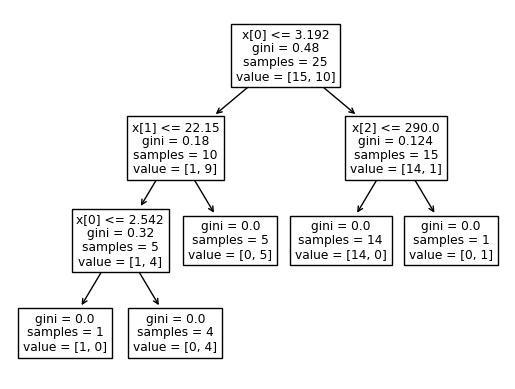

In [95]:
tree.plot_tree(decision_tree=clsModel)

[Text(0.5555555555555556, 0.875, 'wt <= 3.192\ngini = 0.48\nsamples = 25\nvalue = [15, 10]\nclass = auto'),
 Text(0.3333333333333333, 0.625, 'mpg <= 22.15\ngini = 0.18\nsamples = 10\nvalue = [1, 9]\nclass = manual'),
 Text(0.2222222222222222, 0.375, 'wt <= 2.542\ngini = 0.32\nsamples = 5\nvalue = [1, 4]\nclass = manual'),
 Text(0.1111111111111111, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = auto'),
 Text(0.3333333333333333, 0.125, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]\nclass = manual'),
 Text(0.4444444444444444, 0.375, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]\nclass = manual'),
 Text(0.7777777777777778, 0.625, 'hp <= 290.0\ngini = 0.124\nsamples = 15\nvalue = [14, 1]\nclass = auto'),
 Text(0.6666666666666666, 0.375, 'gini = 0.0\nsamples = 14\nvalue = [14, 0]\nclass = auto'),
 Text(0.8888888888888888, 0.375, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = manual')]

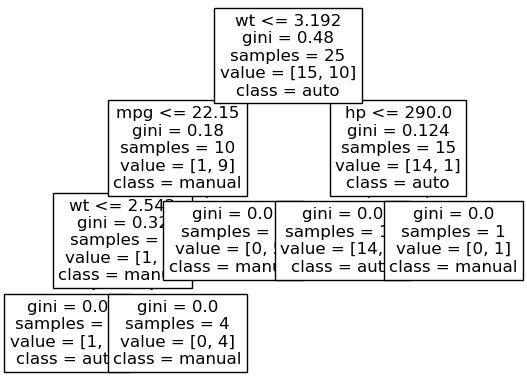

In [96]:
tree.plot_tree(decision_tree=clsModel, feature_names=['wt', 'mpg', 'hp'], class_names=['auto','manual'], fontsize=12)

[Text(0.5555555555555556, 0.875, 'wt <= 3.192\ngini = 0.48\nsamples = 25\nvalue = [15, 10]\nclass = auto'),
 Text(0.3333333333333333, 0.625, 'mpg <= 22.15\ngini = 0.18\nsamples = 10\nvalue = [1, 9]\nclass = manual'),
 Text(0.2222222222222222, 0.375, 'wt <= 2.542\ngini = 0.32\nsamples = 5\nvalue = [1, 4]\nclass = manual'),
 Text(0.1111111111111111, 0.125, '\n  (...)  \n'),
 Text(0.3333333333333333, 0.125, '\n  (...)  \n'),
 Text(0.4444444444444444, 0.375, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]\nclass = manual'),
 Text(0.7777777777777778, 0.625, 'hp <= 290.0\ngini = 0.124\nsamples = 15\nvalue = [14, 1]\nclass = auto'),
 Text(0.6666666666666666, 0.375, 'gini = 0.0\nsamples = 14\nvalue = [14, 0]\nclass = auto'),
 Text(0.8888888888888888, 0.375, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = manual')]

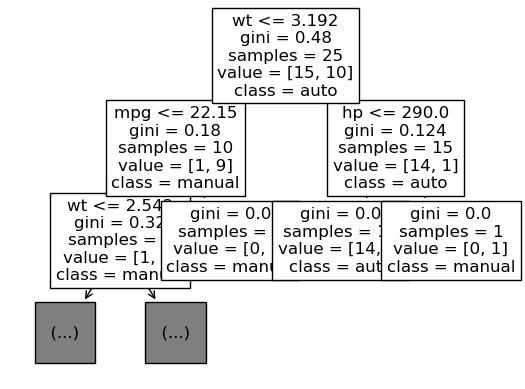

In [97]:
#depth
tree.plot_tree(decision_tree=clsModel, feature_names=['wt', 'mpg', 'hp'], class_names=['auto','manual'], fontsize=12, max_depth=2)

In [98]:
from sklearn.tree import plot_tree
#https://scikit-learn.org/stable/auto_examples/tree/plot_iris_dtc.html#sphx-glr-auto-examples-tree-plot-iris-dtc-py

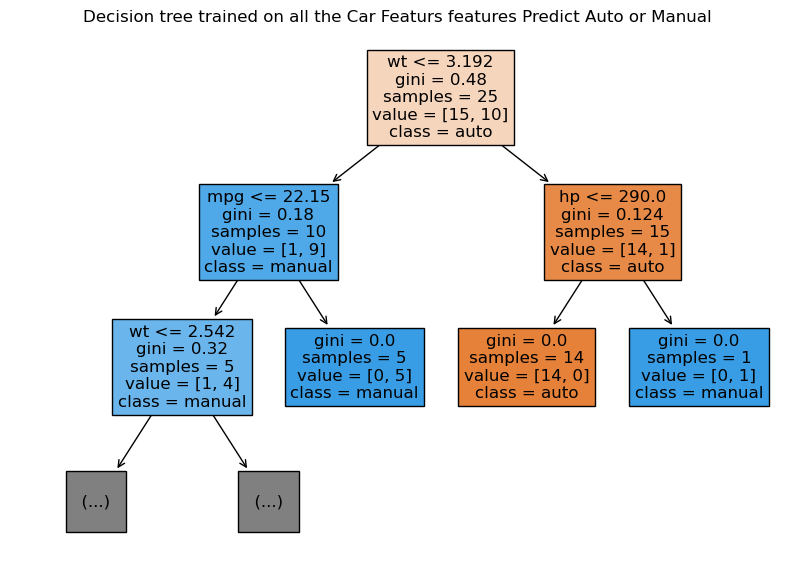

In [99]:
plt.figure(figsize=(10,7))
plot_tree(clsModel, filled=True, feature_names=['wt', 'mpg', 'hp'], class_names=['auto','manual'], fontsize=12, max_depth=2)
plt.title("Decision tree trained on all the Car Featurs features Predict Auto or Manual")
plt.show();

# Regression Tree
Predict mpg (Continuous Variable) on the basis of wt, hp, am

In [101]:
from sklearn.tree import DecisionTreeRegressor

In [102]:
#data
data2 = mt[['mpg','wt','hp','am']]
print(data2.head())
X = data2.drop(columns='mpg')
y = data2.mpg
print(data2.shape, X.shape, y.shape)

                    mpg     wt   hp  am
Mazda RX4          21.0  2.620  110   1
Mazda RX4 Wag      21.0  2.875  110   1
Datsun 710         22.8  2.320   93   1
Hornet 4 Drive     21.4  3.215  110   0
Hornet Sportabout  18.7  3.440  175   0
(32, 4) (32, 3) (32,)


In [103]:
#train and split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=123)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(25, 3) (7, 3) (25,) (7,)


In [104]:
regDT = DecisionTreeRegressor(max_depth=5).fit(X_train, y_train)
regDT

DecisionTreeRegressor(max_depth=5)

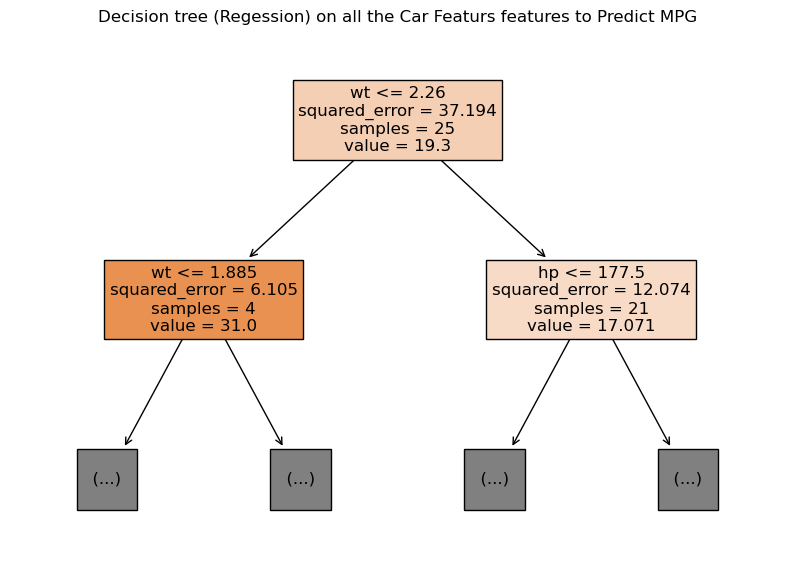

In [105]:
plt.figure(figsize=(10,7))
plot_tree(regDT, filled=True, feature_names=['wt', 'hp', 'am'], fontsize=12, max_depth=1)
plt.title("Decision tree (Regession) on all the Car Featurs features to Predict MPG")
plt.show();
#keep changing value of max_dept to see the effect on tree

# Random Forests
Average of multiple Trees, Slow, more accurate in predicting

In [119]:
#libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

In [111]:
data1 = mt[['am','wt','mpg','hp']]
X = data1.drop(columns = 'am')
y = data1.am
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=123)
fn = X.columns
cn = y.name
print(fn, cn)

Index(['wt', 'mpg', 'hp'], dtype='object') am


In [112]:
rfDT = RandomForestClassifier(n_estimators=10, random_state=123).fit(X_train, y_train)
#summary of 10 trees

In [113]:
rfDT.estimators_

[DecisionTreeClassifier(max_features='sqrt', random_state=843828734),
 DecisionTreeClassifier(max_features='sqrt', random_state=914636141),
 DecisionTreeClassifier(max_features='sqrt', random_state=1228959102),
 DecisionTreeClassifier(max_features='sqrt', random_state=1840268610),
 DecisionTreeClassifier(max_features='sqrt', random_state=974319580),
 DecisionTreeClassifier(max_features='sqrt', random_state=819844194),
 DecisionTreeClassifier(max_features='sqrt', random_state=220395238),
 DecisionTreeClassifier(max_features='sqrt', random_state=941243409),
 DecisionTreeClassifier(max_features='sqrt', random_state=942612051),
 DecisionTreeClassifier(max_features='sqrt', random_state=2109339754)]

In [114]:
print('Imp Featurs as per 1st Tree ', rfDT.estimators_[0].feature_importances_) #wt
print('Imp Featurs as per 2nd Tree ', rfDT.estimators_[1].feature_importances_) # hp, wt, 

Imp Featurs as per 1st Tree  [0.49874687 0.09398496 0.40726817]
Imp Featurs as per 2nd Tree  [0.30864198 0.         0.69135802]


[Text(0.4, 0.875, 'hp <= 101.5\ngini = 0.461\nsamples = 17\nvalue = [16, 9]\nclass = a'),
 Text(0.2, 0.625, 'gini = 0.0\nsamples = 3\nvalue = [0, 4]\nclass = m'),
 Text(0.6, 0.625, 'hp <= 290.0\ngini = 0.363\nsamples = 14\nvalue = [16, 5]\nclass = a'),
 Text(0.4, 0.375, 'wt <= 3.045\ngini = 0.198\nsamples = 13\nvalue = [16, 2]\nclass = a'),
 Text(0.2, 0.125, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]\nclass = m'),
 Text(0.6, 0.125, 'gini = 0.0\nsamples = 11\nvalue = [16, 0]\nclass = a'),
 Text(0.8, 0.375, 'gini = 0.0\nsamples = 1\nvalue = [0, 3]\nclass = m')]

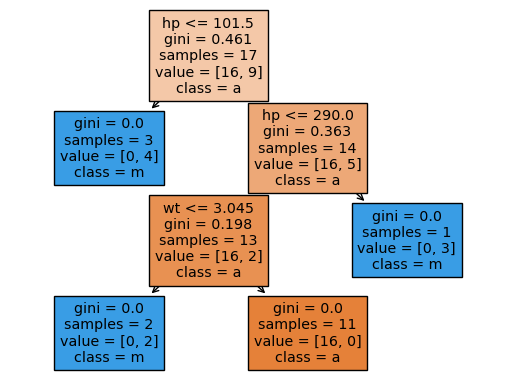

In [115]:
tree.plot_tree(rfDT.estimators_[1], feature_names = fn,  class_names=cn,filled = True)

In [116]:
fig, axes = plt.subplots(nrows = 1, ncols = 5,figsize = (10,2), dpi=3000)
for index in range(0, 5):
    tree.plot_tree(rfDT.estimators_[index],  feature_names = fn, class_names=cn,filled = True,ax = axes[index]);
    axes[index].set_title('Estimator: ' + str(index), fontsize = 11)

In [117]:
y_predRF1 = rfDT.predict(X_test)
print(y_predRF1)

[1 1 0 1 0 1 0]


<Axes: >

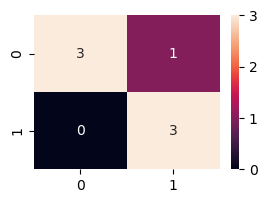

In [123]:
cm = confusion_matrix(y_test, y_predRF1)
plt.figure(figsize = (3,2))
sns.heatmap(cm, annot=True)

In [125]:
accuracy_score(y_test, y_predRF1)
#is it better than DT

0.8571428571428571

In [ ]:
#end here